In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
import warnings
warnings.filterwarnings('ignore')
import graphviz
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#載入數據
bank_analysis=pd.read_csv('bank-additional.csv',sep=';',error_bad_lines=False)
bank_analysis.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
bank_analysis=bank_analysis.drop(['duration'],axis=1)

In [5]:
AI_bank=bank_analysis

In [6]:
#查看是否有缺失值
AI_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
le=LabelEncoder()
#把資料轉成二進制
def Labelencoder(df1,df):
    df1[df]=le.fit_transform(df1[df])
    return df1

In [8]:
AI_bank=Labelencoder(AI_bank,'job')
AI_bank=Labelencoder(AI_bank,'marital')
AI_bank=Labelencoder(AI_bank,'education')
AI_bank=Labelencoder(AI_bank,'default')
AI_bank=Labelencoder(AI_bank,'housing')
AI_bank=Labelencoder(AI_bank,'loan')
AI_bank=Labelencoder(AI_bank,'contact')
AI_bank=Labelencoder(AI_bank,'month')
AI_bank=Labelencoder(AI_bank,'day_of_week')
AI_bank=Labelencoder(AI_bank,'poutcome')
AI_bank=Labelencoder(AI_bank,'y')

In [9]:
#正規化
saler=StandardScaler()

def allsaler(df1,df):
    df1[df]=saler.fit_transform(df1[df])
    return df1

In [10]:
AI_bank=Labelencoder(AI_bank,'age')
AI_bank=Labelencoder(AI_bank,'campaign')
AI_bank=Labelencoder(AI_bank,'pdays')
AI_bank=Labelencoder(AI_bank,'emp.var.rate')
AI_bank=Labelencoder(AI_bank,'cons.price.idx')
AI_bank=Labelencoder(AI_bank,'cons.conf.idx')
AI_bank=Labelencoder(AI_bank,'nr.employed')

>數據拆分

In [11]:
#營銷結果預測
df_poutcome=AI_bank.drop(['poutcome'],axis=1)
y_df_poutcome=AI_bank['poutcome']

In [12]:
#訂閱結果預測
df_y=AI_bank.drop(['y'],axis=1)
y_df_y=AI_bank['y']

In [13]:
df_poutcome_train,df_poutcome_test,y_df_poutcome_train,y_df_poutcome_test=train_test_split(
    df_poutcome,
    y_df_poutcome,
    test_size=0.3,
    random_state=42
)

In [14]:
df_y_train,df_y_test,y_df_y_train,y_df_y_test=train_test_split(
    df_y,
    y_df_y,
    test_size=0.3,
    random_state=42
)

>建模

In [15]:
models=[
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    KNeighborsClassifier()
]

def scores(model,X,y):
    kfold=KFold(n_splits=5,random_state=0)
    predicts=cross_val_score(model,X,y,cv=kfold)
    print(predicts.mean())

>預測營銷結果建模

In [26]:
#使用交叉驗證選出最好的模型
for model in models:
    scores(model,df_poutcome_train,y_df_poutcome_train)

0.9930627768149431
0.9951461101482766
0.9951461101482766
0.9951449066050453
0.9958393510494897
0.8747761409589833


>驗證結果為ExtraTreesClassifier模型最出色

In [17]:
ram=ExtraTreesClassifier()
ram.fit(df_poutcome_train,y_df_poutcome_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [18]:
y_poutcome=ram.predict(df_poutcome_test)
print(y_poutcome)
print(confusion_matrix(y_df_poutcome_test,y_poutcome))
print(classification_report(y_df_poutcome_test,y_poutcome))

[1 1 0 ... 1 1 1]
[[ 126    0    4]
 [   0 1074    0]
 [   0    0   32]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       130
           1       1.00      1.00      1.00      1074
           2       0.89      1.00      0.94        32

    accuracy                           1.00      1236
   macro avg       0.96      0.99      0.98      1236
weighted avg       1.00      1.00      1.00      1236



previous          0.546153
pdays             0.162720
euribor3m         0.073624
nr.employed       0.038392
emp.var.rate      0.035719
cons.price.idx    0.018039
y                 0.015517
dtype: float64


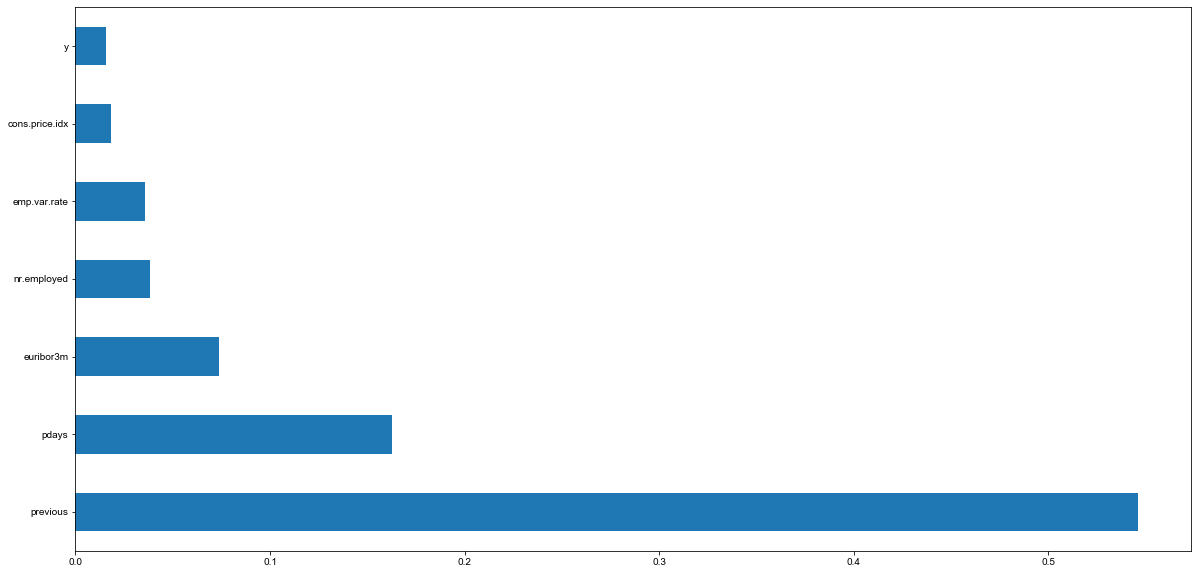

In [19]:
#畫出關聯圖
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
imp=pd.Series(ram.feature_importances_,index=df_poutcome.columns)
imp.nlargest(7).plot(kind='barh')
plt.savefig('營銷特徵.jpg')
print(imp.nlargest(7))

>對訂閱結果進行預測建模

In [24]:
for model in models:
    scores(model,df_y_train,y_df_y_train)

0.8296841902561141
0.8935135037550548
0.8886590121317159
0.8921240130945505
0.8997568842672831
0.8851910023108029


>是RandomForestClassifier模型最出色

In [21]:
rams=RandomForestClassifier(n_estimators=200,max_depth=20)
rams.fit(df_y_train,y_df_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
y_y=rams.predict(df_y_test)
print(y_y)
print(confusion_matrix(y_df_y_test,y_y))
print(classification_report(y_df_y_test,y_y))

[0 0 0 ... 0 0 0]
[[1080   25]
 [ 106   25]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1105
           1       0.50      0.19      0.28       131

    accuracy                           0.89      1236
   macro avg       0.71      0.58      0.61      1236
weighted avg       0.87      0.89      0.87      1236



euribor3m      0.156898
age            0.152677
job            0.078501
nr.employed    0.068429
education      0.068033
campaign       0.067566
day_of_week    0.064015
dtype: float64


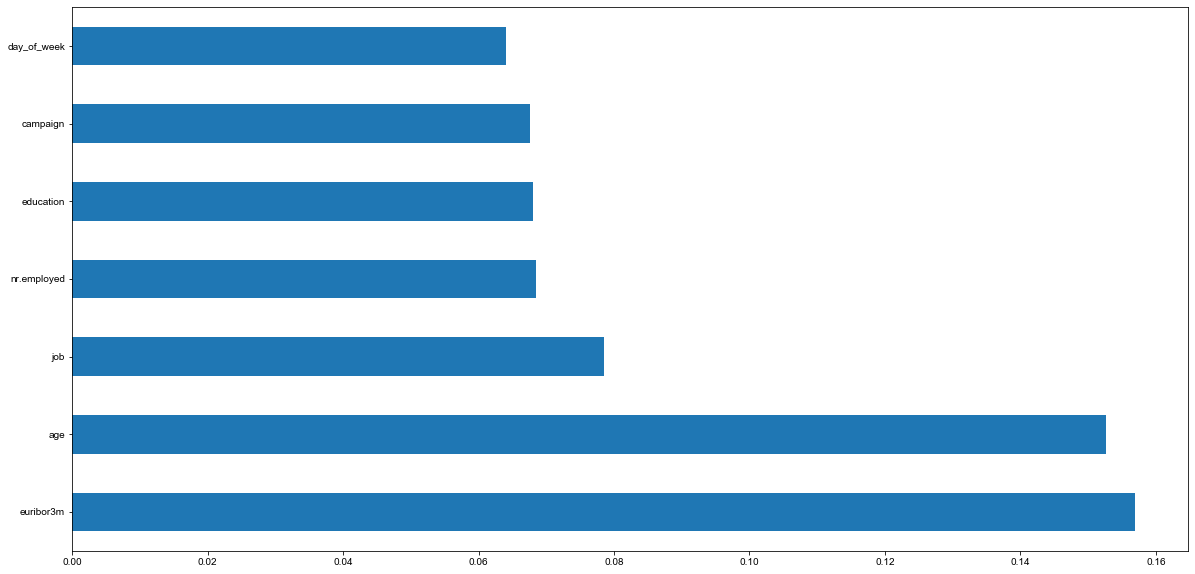

In [23]:
#畫出關聯圖
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
imp2=pd.Series(rams.feature_importances_,index=df_y.columns)
imp2.nlargest(7).plot(kind='barh')
plt.savefig('訂閱特徵.jpg')
print(imp2.nlargest(7))

In [85]:
AI_bank.corr()['y']

age               0.059704
job               0.026725
marital           0.043833
education         0.067316
default          -0.076627
housing           0.000957
loan             -0.012709
contact          -0.137401
month             0.005049
day_of_week      -0.006370
campaign         -0.077265
pdays            -0.329223
previous          0.255697
poutcome          0.123395
emp.var.rate     -0.271402
cons.price.idx   -0.102792
cons.conf.idx     0.069683
euribor3m        -0.298565
nr.employed      -0.351660
y                 1.000000
Name: y, dtype: float64

default

loan

contact

day_of_week 

campaign

pdays

emp.var.rate

cons.price.idx

euribor3m

nr.employed

In [86]:
df_corr=AI_bank.drop([
    'default',
    'loan',
    'contact',
    'day_of_week',
    'campaign',
    'pdays',
    'emp.var.rate',
    'cons.price.idx',
    'euribor3m',
    'nr.employed'
],axis=1)

In [87]:
df_corr

,age,job,marital,education,housing,month,previous,poutcome,cons.conf.idx,y
0,12,1,1,2,2,6,0,1,4,0
1,21,7,2,3,0,6,0,1,16,0
2,7,7,1,3,2,4,0,1,8,0
3,20,7,1,2,1,4,0,1,8,0
4,29,0,1,6,2,7,0,1,7,0
...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,2,3,0,1,6,0
4115,21,0,1,3,2,3,0,1,6,0
4116,9,8,2,3,0,6,1,0,4,0
4117,40,0,1,3,0,1,0,1,17,0


In [88]:
X=df_corr.drop(['y'],axis=1)
y=df_corr['y']

In [89]:
X_train,X_test,y_train,y_test=train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

In [90]:
for model in models:
    scores(model,X_train,y_train)

0.8376522482187558
0.8837979010206046
0.8744337329096862
0.8952484113229348
0.8955938282303102
0.8848455854034277


In [91]:
gr=LogisticRegression()
gr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
y_pred=gr.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score
print(y_pred)
print(classification_report(y_test,y_pred))

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1105
           1       0.76      0.10      0.18       131

    accuracy                           0.90      1236
   macro avg       0.83      0.55      0.56      1236
weighted avg       0.89      0.90      0.87      1236



In [53]:
from sklearn.preprocessing import MinMaxScaler

In [94]:
minscaler=MinMaxScaler()
X=minscaler.fit_transform(X)

In [95]:
X_train,X_test,y_train,y_test=train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

In [96]:
for model in models:
    scores(model,X_train,y_train)

0.831062849027537
0.8851873916811093
0.8772042894280763
0.8949011891007125
0.8948993837858656
0.8910847535143462


In [97]:
gr=GradientBoostingClassifier()
gr.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [98]:
y_pred=gr.predict(X_test)
print(y_pred)
print(classification_report(y_test,y_pred))

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1105
           1       0.55      0.18      0.27       131

    accuracy                           0.90      1236
   macro avg       0.73      0.58      0.61      1236
weighted avg       0.87      0.90      0.87      1236

